# LOAD ATTO station

In [3]:
%load_ext autoreload

%autoreload 2

from pathlib import Path
from bs_fdbck.util.BSOA_datamanip import ds2df_inc_preprocessing, ds2df_echam
from bs_fdbck.util.collocate.collocateLONLAToutput import CollocateLONLATout
from bs_fdbck.util.collocate.collocate_echam_salsa import CollocateModelEcham
import useful_scit.util.log as log
from bs_fdbck.util.plot.BSOA_plots import make_cool_grid, plot_scatter
log.ger.setLevel(log.log.INFO)
import time
import xarray as xr
import matplotlib.pyplot as plt

/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/bs_fdbck/data_info/area_defs.csv
{'NCONC': ['NCONC01', 'NCONC02', 'NCONC04', 'NCONC05', 'NCONC06', 'NCONC07', 'NCONC08', 'NCONC09', 'NCONC10', 'NCONC12', 'NCONC14'], 'SIGMA': ['SIGMA01', 'SIGMA02', 'SIGMA04', 'SIGMA05', 'SIGMA06', 'SIGMA07', 'SIGMA08', 'SIGMA09', 'SIGMA10', 'SIGMA12', 'SIGMA14'], 'NMR': ['NMR01', 'NMR02', 'NMR04', 'NMR05', 'NMR06', 'NMR07', 'NMR08', 'NMR09', 'NMR10', 'NMR12', 'NMR14']}
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import pandas as pd

In [5]:
from bs_fdbck.constants import path_measurement_data

In [6]:

import numpy as np



In [7]:

select_station = 'ATTO'
model_lev_i = -1

In [8]:
plot_path = Path(f'Plots/{select_station}')

In [9]:
def make_fn_scat(case, v_x, v_y):
    _x = v_x.split('(')[0]
    _y = v_y.split('(')[0]
    f = f'scat_all_years_echam_noresm_{case}_{_x}_{_y}-ATTO_ukesm.png'
    return plot_path /f

In [10]:
plot_path.mkdir(exist_ok=True, parents=True)

In [11]:
plot_path

PosixPath('Plots/ATTO')

In [12]:
from bs_fdbck.constants import path_measurement_data
postproc_data = path_measurement_data /'model_station'/select_station
postproc_data_obs = path_measurement_data /select_station/'processed'

In [13]:
fn_obs_comb_data_full_time =postproc_data_obs /'ATTO_data_comb_hourly.nc'

# Load observational data: 

In [14]:
postproc_data_obs = path_measurement_data /'ATTO'/'processed'

In [15]:


ds_ATTO = xr.open_dataset(fn_obs_comb_data_full_time)

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
(click 8.0.1 (/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages), Requirement.parse('click<8,>=4.0'), {'rasterio'})
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [16]:
fn_obs_comb_data_full_time

PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/ATTO/processed/ATTO_data_comb_hourly.nc')

# Read in model data:

In [17]:
models = ['ECHAM-SALSA','NorESM', 'EC-Earth', 'UKESM']
mod2cases = {'ECHAM-SALSA' : ['SALSA_BSOA_feedback'],
             'NorESM' : ['OsloAero_intBVOC_f09_f09_mg17_fssp'],
             'EC-Earth' : ['ECE3_output_Sara'],
             'UKESM' : ['AEROCOMTRAJ'],
             'Observations':['Obs'],
            }
di_mod2cases = mod2cases.copy()

In [18]:
select_station='ATTO'

In [19]:
dic_df_pre=dict()
for mod in models:
    print(mod)
    dic_df_pre[mod] = dict()
    for ca in mod2cases[mod]:
        print(mod, ca)
        if model_lev_i !=-2:
            fn_out = postproc_data/f'{select_station}_station_{mod}_{ca}_ilev{model_lev_i}.csv'
        else:
            fn_out = postproc_data/f'{select_station}_station_{mod}_{ca}.csv'
        #fn_out = postproc_data/f'{select_station}_station_{mod}_{ca}.csv'
        print(fn_out)
        dic_df_pre[mod][ca] = pd.read_csv(fn_out, index_col=0)
        dic_df_pre[mod][ca].index = pd.to_datetime(dic_df_pre[mod][ca].index)
        #dic_df_mod_case[mod][ca].to_csv(fn_out)

ECHAM-SALSA
ECHAM-SALSA SALSA_BSOA_feedback
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/model_station/ATTO/ATTO_station_ECHAM-SALSA_SALSA_BSOA_feedback_ilev-1.csv
NorESM
NorESM OsloAero_intBVOC_f09_f09_mg17_fssp
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/model_station/ATTO/ATTO_station_NorESM_OsloAero_intBVOC_f09_f09_mg17_fssp_ilev-1.csv
EC-Earth
EC-Earth ECE3_output_Sara
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/model_station/ATTO/ATTO_station_EC-Earth_ECE3_output_Sara_ilev-1.csv
UKESM
UKESM AEROCOMTRAJ
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/model_station/ATTO/ATTO_station_UKESM_AEROCOMTRAJ_ilev-1.csv


## Read in observations

In [20]:
ds_ATTO = xr.open_dataset(fn_obs_comb_data_full_time, engine='netcdf4')

In [21]:
ds_ATTO = ds_ATTO.sel(time_traj=0)

In [22]:
varl = ['Pressure_reanalysis', 'Potential_Temperature_reanalysis', 'Temperature_reanalysis', 'Rainfall', 'Mixing_Depth', 'Relative_Humidity', 'Specific_Humidity_reanalysis',
 'Mixing_Ratio','Solar_Radiation', 'condensation_sink', 'N50-500', 'N100-500', 'N200-500', 'timeUTC-3', 'pressure', 'temperature', 'humidity','precip',#'Solar_inc_Wm2',
        #'Solar_out_Wm2',
        #'wind_speed',
        #'wind_speed_v',
        'OA'
]
ds_ATTO[varl].squeeze().to_dataframe()

,Pressure_reanalysis,Potential_Temperature_reanalysis,Temperature_reanalysis,Rainfall,Mixing_Depth,Relative_Humidity,Specific_Humidity_reanalysis,Mixing_Ratio,Solar_Radiation,condensation_sink,N50-500,N100-500,N200-500,timeUTC-3,pressure,temperature,humidity,precip,OA,time_traj
time,,,,,,,,,,,,,,,,,,,,
2014-03-10 15:00:00,974.8,305.5,303.3,0.0,1437.6,55.1,15.1,15.4,681.2,0.001503,316.350342,259.764876,123.407339,2014-03-10 16:00:00,986.86,31.46,57.56,0.0,0.990,0
2014-03-10 16:00:00,974.1,305.5,303.2,0.0,1268.8,56.0,15.2,15.6,596.6,0.001285,288.441016,221.149397,102.265441,2014-03-10 17:00:00,986.21,31.62,59.16,0.0,1.620,0
2014-03-10 17:00:00,974.9,304.5,302.3,0.0,863.0,60.5,15.6,16.0,504.7,0.001317,294.872421,223.659092,104.508354,2014-03-10 18:00:00,986.25,30.01,66.29,0.0,1.660,0
2014-03-10 18:00:00,975.8,303.5,301.4,0.0,453.1,65.1,15.9,16.3,412.7,0.001469,323.442362,243.316332,120.456843,2014-03-10 19:00:00,986.47,28.18,70.54,0.0,0.985,0
2014-03-10 19:00:00,976.6,302.5,300.5,0.0,43.2,69.7,16.1,16.6,320.7,0.001441,323.533283,236.004666,116.970997,2014-03-10 20:00:00,987.01,27.40,82.67,0.0,2.420,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-28 05:00:00,979.4,298.0,296.2,0.0,254.7,85.8,15.3,15.7,18.9,0.000014,2.886702,2.418678,1.160755,2019-01-28 06:00:00,NaN,NaN,NaN,NaN,NaN,0
2019-01-28 06:00:00,980.0,297.9,296.2,0.0,363.3,88.0,15.7,16.1,38.1,0.000013,2.189876,2.165097,1.267096,2019-01-28 07:00:00,NaN,NaN,NaN,NaN,NaN,0
2019-01-28 07:00:00,980.7,297.8,296.1,0.0,472.0,90.2,16.0,16.4,57.4,0.000011,2.075599,1.882887,0.938360,2019-01-28 08:00:00,NaN,NaN,NaN,NaN,NaN,0


In [23]:
dic_df_pre['Observations'] = dict()
dic_df_pre['Observations']['Observations'] = ds_ATTO[varl].squeeze().to_dataframe()
dic_df_pre['Observations']['Observations'].index = pd.to_datetime(dic_df_pre['Observations']['Observations'].index)

In [24]:
mod2cases['Observations'] = ['Observations']

In [25]:
dic_mod_ca = dic_df_pre.copy()

<AxesSubplot:xlabel='time'>

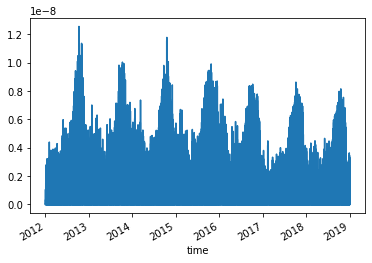

In [26]:
_ds =dic_mod_ca['ECHAM-SALSA']['SALSA_BSOA_feedback']

_ds =dic_mod_ca['NorESM'][mod2cases['NorESM'][0]]

_ds['SFisoprene'].plot()

### Save result in dictionary

In [27]:
dic_df_mod_case = di_mod2cases
for mo in models:
    cs = mod2cases[mo]
    for c in cs: 
        if len(cs)>1:
            use_name = f'{mo}_{c}'
        else:
            use_name =mo

In [28]:
dic_df_mod_case = dic_mod_ca.copy()

In [29]:
from bs_fdbck.util.BSOA_datamanip import calculate_daily_median_summer,calculate_summer_median

In [30]:
for mod in models:
    for ca in mod2cases[mod]:
        _df = dic_df_mod_case[mod][ca]
        for v in ['OA','N50','N100','N200','N500']:
            if f'{v}_STP' in _df.columns:
                if v in _df.columns:
                    _df = _df.rename({v:f'{v}_orig'}, axis=1)
                _df = _df.rename({f'{v}_STP':v}, axis=1)
        dic_df_mod_case[mod][ca] = _df

### Calculate Nx-500:


In [31]:
for mod in models:
    print(mod)
    for ca in dic_df_mod_case[mod].keys():
        print(ca)
        _df = dic_df_mod_case[mod][ca]
        for v in ['N50','N100','N200']:
            _df[f'{v}-500'] = _df[v] -_df['N500'] 
        dic_df_mod_case[mod][ca] = _df

ECHAM-SALSA
SALSA_BSOA_feedback
NorESM
OsloAero_intBVOC_f09_f09_mg17_fssp
EC-Earth
ECE3_output_Sara
UKESM
AEROCOMTRAJ


In [32]:
dic_df_atto = dic_df_pre.copy()

In [33]:
dic_df_pre_ATTO =dict()
for key in dic_df_pre.keys():
    dic_df_pre_ATTO[key] = dict()
    for key2 in dic_df_pre[key].keys():
        dic_df_pre_ATTO[key][key2] = dic_df_pre[key][key2].copy()



# Merge with observations:

In [34]:
dic_df_pre = dict()#dic_df_mod_case.copy()#deep=True)
for mod in dic_df_mod_case.keys():
    dic_df_pre[mod] = dic_df_mod_case[mod].copy()

In [35]:
vars_obs = ['OA', 'N100-500','N50-500','N200-500','temperature']

In [36]:
ds_ATTO

<xarray.Dataset>
Dimensions:                           (time: 25448, D: 104, timeUTC: 25448, timeUTC-4: 25448, limit: 2)
Coordinates:
  * time                              (time) datetime64[ns] 2014-03-10T15:00:...
  * D                                 (D) float64 10.2 10.6 10.9 ... 399.5 414.2
    time_traj                         int64 0
  * timeUTC                           (timeUTC) datetime64[ns] 2014-03-10T19:...
  * timeUTC-4                         (timeUTC-4) datetime64[ns] 2014-03-10T1...
  * limit                             (limit) object 'bottom' 'top'
Data variables: (12/42)
    pnsd                              (time, D) float64 ...
    Pressure_reanalysis               (time) float64 974.8 974.1 ... 980.7 978.3
    Potential_Temperature_reanalysis  (time) float64 305.5 305.5 ... 301.9 304.3
    Temperature_reanalysis            (time) float64 303.3 303.2 ... 300.2 302.4
    Rainfall                          (time) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    Mixing_Depth                      (time) float64 1.438e+03 ... 1.589e+03
    ...                                ...
    PAR_in                            (time) float64 ...
    PAR_out                           (time) float64 ...
    LW_atm                            (time) float64 ...
    LW_terr                           (time) float64 ...
    OA                                (time) float64 0.99 1.62 1.66 ... nan nan
    BC_conc                           (time) float64 ...

In [37]:
df_ATTO = ds_ATTO[vars_obs].drop('time_traj').to_dataframe()

df_ATTO['some_obs_missing'] = df_ATTO.isnull().any(axis=1)

In [38]:
df_for_merge = df_ATTO[['OA','N100-500', 'some_obs_missing']].rename({'OA':'obs_OA','N100-500':'obs_N100-500',},axis=1)

In [39]:
for mod in dic_df_mod_case.keys():
    print(mod)
    for ca in dic_df_mod_case[mod].keys():
        dic_df_mod_case[mod][ca] = pd.merge(dic_df_pre[mod][ca], df_for_merge ,right_on='time', left_on='time', how='outer')
        dic_df_mod_case[mod][ca]['year'] = dic_df_mod_case[mod][ca].index.year

ECHAM-SALSA
NorESM
EC-Earth
UKESM
Observations


In [40]:
df_ATTO_obs_rename = df_ATTO.rename({'Org':'OA','temperature':'T_C'}, axis=1)

In [41]:
df_ATTO_obs_rename

,OA,N100-500,N50-500,N200-500,T_C,some_obs_missing
time,,,,,,
2014-03-10 15:00:00,0.990,259.764876,316.350342,123.407339,31.46,False
2014-03-10 16:00:00,1.620,221.149397,288.441016,102.265441,31.62,False
2014-03-10 17:00:00,1.660,223.659092,294.872421,104.508354,30.01,False
2014-03-10 18:00:00,0.985,243.316332,323.442362,120.456843,28.18,False
2014-03-10 19:00:00,2.420,236.004666,323.533283,116.970997,27.40,False
...,...,...,...,...,...,...
2019-01-28 05:00:00,NaN,2.418678,2.886702,1.160755,NaN,True
2019-01-28 06:00:00,NaN,2.165097,2.189876,1.267096,NaN,True
2019-01-28 07:00:00,NaN,1.882887,2.075599,0.938360,NaN,True


## Add observations to dictionary

In [42]:
dic_df_mod_case['Observations'] = dict()
dic_df_mod_case['Observations']['Observations'] = df_ATTO_obs_rename

In [43]:
dic_df_mod_case['Observations'].keys()

dict_keys(['Observations'])

In [44]:
dic_mod2case = mod2cases

In [45]:
def add_log(df, varl=None):
    if varl is None:
        varl = ['OA','N100', 'Org','N100 (cm^-3)','N50','N150','N200']
    var_exist = df.columns
    
    varl_f = set(varl).intersection(var_exist)
    print(varl_f)
    for v in varl_f:
        df[f'log10({v})'] = np.log10(df[v])
    return df


for mod in dic_df_mod_case.keys():
    for c in dic_df_mod_case[mod].keys():
    
        dic_df_mod_case[mod][c] = add_log(dic_df_mod_case[mod][c])
        #dic_dfsm_mod_case[mod][c] = add_log(dic_dfsm_mod_case[mod][c])
        
df_ATTO = add_log(df_ATTO)

{'OA', 'N50', 'N200', 'N100'}
{'N150', 'N50', 'N200', 'OA', 'N100'}
{'N150', 'N50', 'N200', 'OA', 'N100'}
{'N150', 'N50', 'N200', 'OA', 'N100'}
{'OA'}
{'OA'}


/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [46]:
mod='NorESM'

In [47]:
ca = mod2cases[mod][0]

In [48]:
mask_obs_N = dic_df_mod_case[mod][ca]['obs_N100-500'].notnull()
mask_obs_OA = dic_df_mod_case[mod][ca]['obs_OA'].notnull()

In [49]:
from bs_fdbck.util.plot.BSOA_plots import cdic_model
import seaborn as sns
from matplotlib import pyplot as plt, gridspec as gridspec
from bs_fdbck.util.plot.BSOA_plots import make_cool_grid2, make_cool_grid3
import scipy

# Load data SMEAR: 


In [50]:
from pathlib import Path
import matplotlib as mpl
import xarray as xr

In [51]:
from pathlib import Path

from bs_fdbck.util.BSOA_datamanip import ds2df_inc_preprocessing
from bs_fdbck.util.collocate.collocateLONLAToutput import CollocateLONLATout
from bs_fdbck.util.collocate.collocate_echam_salsa import CollocateModelEcham
import useful_scit.util.log as log

from bs_fdbck.util.plot.BSOA_plots import make_cool_grid, plot_scatter

log.ger.setLevel(log.log.INFO)
import time
import xarray as xr
import matplotlib.pyplot as plt

In [52]:
from bs_fdbck.util.plot.BSOA_plots import cdic_model

In [53]:
from bs_fdbck.constants import path_measurement_data
select_station = 'SMR'
postproc_data = path_measurement_data /'model_station'/select_station
postproc_data_obs = path_measurement_data /select_station/'processed'

In [54]:
path_comb_data_full_time =postproc_data_obs /'SMEAR_data_comb_hourly.csv'

In [55]:
plot_path = Path(f'Plots/{select_station}')

In [56]:
def make_fn_eval(case,_type):
    #_x = v_x.split('(')[0]
    #_y = v_y.split('(')[0]
    f = f'evalOA_echam_{case}_{_type}_{select_station}.png'
    return plot_path /f

In [57]:
plot_path.mkdir(exist_ok=True, parents=True)

## Read in model data. 

In [58]:
models = ['ECHAM-SALSA','NorESM', 'EC-Earth', 'UKESM']
mod2cases = {'ECHAM-SALSA' : ['SALSA_BSOA_feedback'],
             'NorESM' : ['OsloAero_intBVOC_f09_f09_mg17_fssp'],
             'EC-Earth' : ['ECE3_output_Sara'],
             'UKESM' : ['AEROCOMTRAJ'],
             'Observations':['Obs'],
            }
di_mod2cases = mod2cases.copy()

In [59]:
from bs_fdbck.preprocess.launch_monthly_station_collocation import launch_monthly_station_output
from bs_fdbck.util.Nd.sizedist_class_v2.SizedistributionBins import SizedistributionStationBins
from bs_fdbck.util.collocate.collocateLONLAToutput import CollocateLONLATout
from bs_fdbck.data_info.variable_info import list_sized_vars_nonsec, list_sized_vars_noresm
import useful_scit.util.log as log
log.ger.setLevel(log.log.INFO)
import time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
import numpy as np

In [62]:
import numpy as np
from sklearn.linear_model import LinearRegression, BayesianRidge

## Constants:

In [63]:
R = 287.058
pressure = 1000. #hPa
kg2ug = 1e9
temperature = 273.15

In [64]:
import pandas as pd

## Read in model data

In [65]:
dic_df_pre['Observations']['Observations'].columns

Index(['Pressure_reanalysis', 'Potential_Temperature_reanalysis',
       'Temperature_reanalysis', 'Rainfall', 'Mixing_Depth',
       'Relative_Humidity', 'Specific_Humidity_reanalysis', 'Mixing_Ratio',
       'Solar_Radiation', 'condensation_sink', 'N50-500', 'N100-500',
       'N200-500', 'timeUTC-3', 'pressure', 'temperature', 'humidity',
       'precip', 'OA', 'time_traj'],
      dtype='object')

In [66]:
dic_df_pre=dict()
for mod in models:
    print(mod)
    dic_df_pre[mod] = dict()
    for ca in mod2cases[mod]:
        print(mod, ca)
        fn_out = postproc_data/f'{select_station}_station_{mod}_{ca}.csv'
        print(fn_out)
        dic_df_pre[mod][ca] = pd.read_csv(fn_out, index_col=0)
        dic_df_pre[mod][ca].index = pd.to_datetime(dic_df_pre[mod][ca].index)
        #dic_df_mod_case[mod][ca].to_csv(fn_out)

ECHAM-SALSA
ECHAM-SALSA SALSA_BSOA_feedback
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/model_station/SMR/SMR_station_ECHAM-SALSA_SALSA_BSOA_feedback.csv
NorESM
NorESM OsloAero_intBVOC_f09_f09_mg17_fssp
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/model_station/SMR/SMR_station_NorESM_OsloAero_intBVOC_f09_f09_mg17_fssp.csv
EC-Earth
EC-Earth ECE3_output_Sara
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/model_station/SMR/SMR_station_EC-Earth_ECE3_output_Sara.csv
UKESM
UKESM AEROCOMTRAJ
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/model_station/SMR/SMR_station_UKESM_AEROCOMTRAJ.csv


In [67]:
for mod in models:
    for ca in mod2cases[mod]:
        _df = dic_df_pre[mod][ca]
        for v in ['OA','N50','N100','N200']:
            if f'{v}_STP' in _df.columns:
                if v in _df.columns:
                    _df = _df.rename({v:f'{v}_orig'}, axis=1)
                _df = _df.rename({f'{v}_STP':v}, axis=1)
        dic_df_pre[mod][ca] = _df

In [68]:
for mo in ['EC-Earth','UKESM']:
    if mo in models:
        for ca in mod2cases[mo]:
            dic_df_pre[mo][ca]['OAG'] = dic_df_pre[mo][ca]['OA']

### Double check EC-Earth

In [69]:
mo = 'EC-Earth'
_df = dic_df_pre[mo][mod2cases[mo][0]]

In [70]:
_df['hour'] = _df.index.hour

In [71]:
_df.columns

Index(['station', 'time_orig', 'lev', 'CCN0.20', 'CCN1.00', 'M_BCACS',
       'M_BCAII', 'M_BCAIS', 'M_BCCOS', 'M_DUACI', 'M_DUACS', 'M_DUCOI',
       'M_DUCOS', 'M_POMACS', 'M_POMAII', 'M_POMAIS', 'M_POMCOS', 'M_SO4ACS',
       'M_SO4COS', 'M_SO4NUS', 'M_SOAACS', 'M_SOAAII', 'M_SOAAIS', 'M_SOACOS',
       'M_SOANUS', 'M_SSACS', 'M_SSCOS', 'N_ACI', 'N_ACS', 'N_AII', 'N_AIS',
       'N_COI', 'N_COS', 'N_NUS', 'RDRY_ACS', 'RDRY_AIS', 'RDRY_COS',
       'RDRY_NUS', 'RWET_ACI', 'RWET_ACS', 'RWET_AII', 'RWET_AIS', 'RWET_COI',
       'RWET_COS', 'RWET_NUS', 'emiisop', 'emiterp', 'loadsoa', 'od350aer',
       'od440aer', 'od550aer', 'od550oa', 'od550soa', 'od870aer', 'lev_ifs',
       'T', 'DDRY_NUS', 'DDRY_AIS', 'DDRY_ACS', 'DDRY_COS', 'DWET_AII',
       'DWET_ACI', 'DWET_COI', 'N50_amb', 'N70', 'N100_amb', 'N150',
       'N200_amb', 'N500', 'N50-500', 'N70-500', 'N100-500', 'N150-500',
       'N200-500', 'OA_amb', 'POM', 'SOA', 'SOA2', 'T_C', 'is_JJA', 'is_JA',
       'isSummer', 'density',

<AxesSubplot:xlabel='hour'>

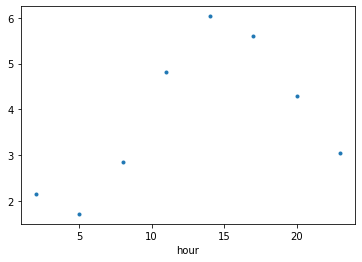

In [72]:
_df.groupby('hour').mean()['T_C'].plot(marker='.')

<AxesSubplot:xlabel='hour'>

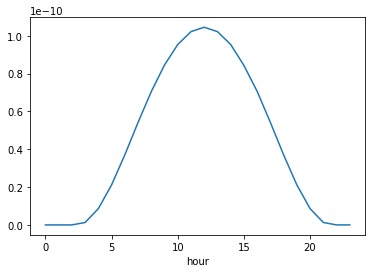

In [73]:
_df.groupby('hour').mean()['emiisop'].plot()

<AxesSubplot:xlabel='hour'>

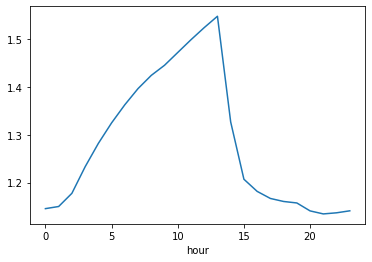

In [74]:
_df.groupby('hour').mean()['POM'].plot()

<AxesSubplot:xlabel='hour'>

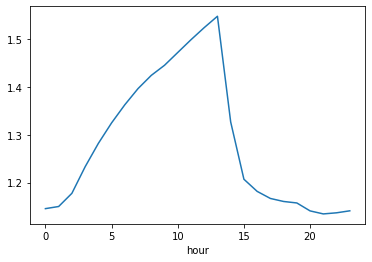

In [75]:
_df.groupby('hour').mean()['POM'].plot()

<AxesSubplot:xlabel='hour'>

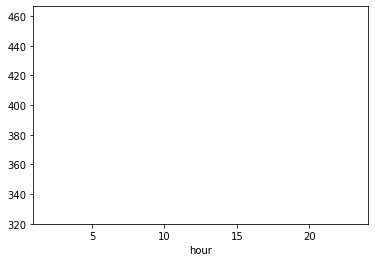

In [76]:
_df.groupby('hour').mean()['N100'].plot()

## Read in observations

In [77]:
df_obs = pd.read_csv(path_comb_data_full_time,index_col=0)

In [78]:
df_obs = df_obs.rename({'Org_STP':'OA'}, axis=1)

In [79]:
dic_df_pre['Observations']=dict()
dic_df_pre['Observations']['Observations'] = df_obs
dic_df_pre['Observations']['Observations'].index = pd.to_datetime(dic_df_pre['Observations']['Observations'].index)

In [80]:
mod2cases['Observations']= ['Observations']

## Set uo dic with all OA values from models

In [81]:
dic_df_mod_case = dic_df_pre

In [82]:
dic_mod_oa = dict()
#dic_mod_soa = dict()
dic_mod_all = dict()


for mod in models:
    dic_mod_oa[mod] = dict()
    #dic_mod_soa[mod] = dict()
    dic_mod_all[mod] = dict()
    for ca in di_mod2cases[mod]:
        dic_mod_oa[mod][ca] = dict()
        #dic_mod_soa[mod][ca] = dict()
        dic_mod_all[mod][ca] = dict()
    
    
for mo in models:
    print(mo)
    for ca in di_mod2cases[mo]:
        print(ca)
        _df = dic_df_mod_case[mo][ca]
        dic_mod_oa[mo][ca] =_df['OA']
        #dic_mod_soa[mo][ca][i] =_df['SOA']
        dic_mod_all[mo][ca] =_df
    



ECHAM-SALSA
SALSA_BSOA_feedback
NorESM
OsloAero_intBVOC_f09_f09_mg17_fssp
EC-Earth
ECE3_output_Sara
UKESM
AEROCOMTRAJ


<AxesSubplot:xlabel='time'>

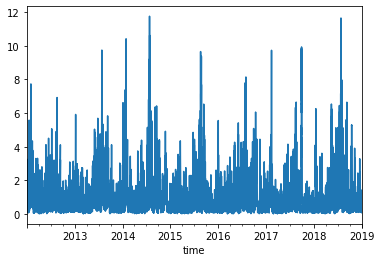

In [83]:
dic_df_pre['ECHAM-SALSA']['SALSA_BSOA_feedback']['OA'].plot()

(390048.0, 390792.0)

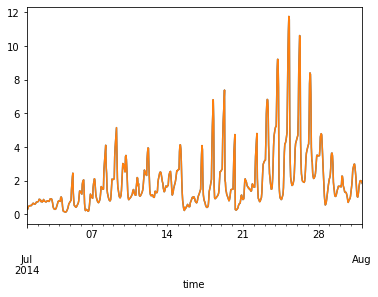

In [84]:
dic_df_pre['ECHAM-SALSA']['SALSA_BSOA_feedback'].resample('h').ffill()['OA'].plot()         
dic_df_pre['ECHAM-SALSA']['SALSA_BSOA_feedback']['OA'].plot()
plt.xlim(['2014-07','2014-08'])

In [85]:
dic_df_pre_SMR =dict()
for key in dic_df_pre.keys():
    dic_df_pre_SMR[key] = dict()
    for key2 in dic_df_pre[key].keys():
        dic_df_pre_SMR[key][key2] = dic_df_pre[key][key2].copy()



## Merge with observations:

In [86]:
dic_df_mod_case = dic_df_pre.copy()

In [87]:
mask_obs_OA =  dic_df_pre['Observations']['Observations']['OA'].notnull()

In [88]:
_df = dic_df_pre['Observations']['Observations']['OA'].rename('Obs')

df_OA_all = pd.DataFrame(_df)
df_OAG_all = pd.DataFrame(_df)

In [89]:
df_OA_all

,Obs
time,
2012-01-01 00:00:00,NaN
2012-01-01 01:00:00,NaN
2012-01-01 02:00:00,NaN
2012-01-01 03:00:00,NaN
2012-01-01 04:00:00,NaN
...,...
2020-12-31 19:00:00,NaN
2020-12-31 20:00:00,NaN
2020-12-31 21:00:00,NaN


In [90]:
for mod in dic_df_pre.keys():
    if mod=='Observations':
        continue
    print(mod)
    for ca in dic_df_pre[mod].keys():
        if len(dic_df_pre[mod].keys())==1:
            use_name = mod
        else: 
            use_name = f'{mod}: {ca}'
        df_OA_all[use_name] = dic_df_pre[mod][ca]['OA']
        df_OAG_all[use_name] = dic_df_pre[mod][ca]['OAG']


#df_OA_all = df_OA_all[df_OA_all[mod].notna()]
df_OA_all = df_OA_all[df_OA_all['Obs'].notna()]
#df_OAG_all = df_OAG_all[df_OAG_all[mod].notna()]
df_OAG_all = df_OAG_all[df_OAG_all['Obs'].notna()]

ECHAM-SALSA
NorESM
EC-Earth
UKESM


In [91]:
df_OA_all

,Obs,ECHAM-SALSA,NorESM,EC-Earth,UKESM
time,,,,,
2012-05-24 14:00:00,3.855590,0.521079,0.880730,2.321318,1.156147
2012-05-24 15:00:00,3.722964,0.495629,0.892980,NaN,NaN
2012-05-24 16:00:00,3.481069,0.629300,0.903716,NaN,NaN
2012-05-24 17:00:00,3.249105,0.727798,0.913719,1.252269,1.323446
2012-05-24 18:00:00,2.435595,0.919183,0.924918,NaN,NaN
...,...,...,...,...,...
2017-12-31 19:00:00,1.577723,0.346672,3.018541,NaN,NaN
2017-12-31 20:00:00,1.742238,0.447327,3.016776,2.493944,0.571691
2017-12-31 21:00:00,1.743366,0.480732,2.944646,NaN,NaN


In [92]:
orgname={'NorESM' : 'OA',
         'ECHAM-SALSA': 'OA'}

In [93]:
seasons2months = {'DJF':[12,1,2],
        'MAM': [3,4,5],
        'JJA':[6,7,8],
        'SON':[9,10,11],
    'FMA': [  2,3,4], 
                  
       }

In [94]:
seasons2months2 = {
    'JFM': [ 1, 2,3], 
    'FMA': [  2,3,4], 
    'AMJ': [ 4, 5,6], 
    'JAS': [ 7, 8,9], 
    'OND': [ 10, 11,12],
}

In [95]:
linestyle_dic = {
    'Obs': 'solid',
    'NorESM':'dashdot',
    'UKESM':'dashdot',
    'ECHAM-SALSA':'-.',
    'EC-Earth':'-.',
}

## Choose months: 

In [96]:
months = [1,2,3,4,5,6,7,8,9,10,11,12]


# ANALYSIS


<AxesSubplot:xlabel='time'>

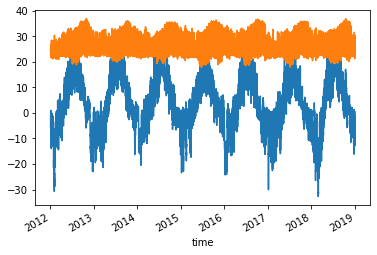

In [97]:
dic_df_pre_SMR['NorESM']['OsloAero_intBVOC_f09_f09_mg17_fssp']['T_C'].plot()

dic_df_pre_ATTO['NorESM']['OsloAero_intBVOC_f09_f09_mg17_fssp']['T_C'].plot()

In [98]:
df_noresm_smr = dic_df_pre_SMR['NorESM']['OsloAero_intBVOC_f09_f09_mg17_fssp'].resample('d').mean()
df_noresm_atto = dic_df_pre_ATTO['NorESM']['OsloAero_intBVOC_f09_f09_mg17_fssp'].resample('d').mean()


In [99]:
df_obs_smr = dic_df_pre_SMR['Observations']['Observations'].resample('d').mean()
df_obs_atto = dic_df_pre_ATTO['Observations']['Observations'].resample('d').mean()


In [100]:
dic_df = dict(
    ATTO = dict(NorESM=df_noresm_atto, Observations=df_obs_atto),
    SMR = dict(NorESM=df_noresm_smr, Observations=df_obs_smr),
)
              

In [101]:
dic_season= dict(
    ATTO = 'FMA',
    SMR = 'JJA',
)

In [102]:
station = 'SMR'



<AxesSubplot:xlabel='time'>

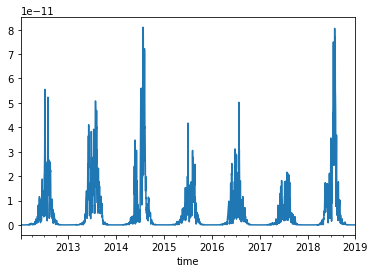

In [103]:
df_noresm_smr['SFisoprene'].plot()

In [104]:
seasons2months['JJA']


[6, 7, 8]

<AxesSubplot:xlabel='SFisoprene', ylabel='OA'>

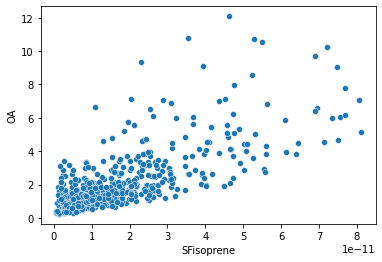

In [105]:
station = 'SMR'
season = dic_season[station]
_df = dic_df[station]['NorESM']

months = seasons2months[season]
_df = _df[_df.index.month.isin(months)]
#_df['SFisoprene'].plot()
sns.scatterplot(x='SFisoprene', y='OA', data = _df)

<AxesSubplot:xlabel='T_C', ylabel='SFisoprene'>

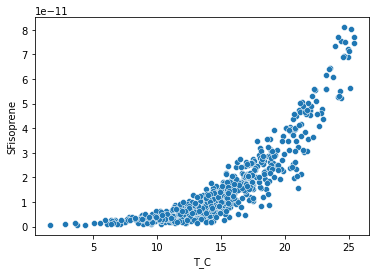

In [106]:
station = 'SMR'
season = dic_season[station]
_df = dic_df[station]['NorESM'].resample('d').mean()

months = seasons2months[season]
_df = _df[_df.index.month.isin(months)]
#_df['SFisoprene'].plot()
sns.scatterplot(y='SFisoprene', x='T_C', data = _df)

<AxesSubplot:xlabel='OA', ylabel='SFisoprene'>

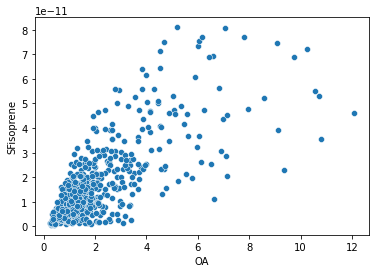

In [107]:
station = 'SMR'
season = dic_season[station]
_df = dic_df[station]['NorESM'].resample('d').mean()

months = seasons2months[season]
_df = _df[_df.index.month.isin(months)]
#_df['SFisoprene'].plot()
sns.scatterplot(y='SFisoprene', x='OA', data = _df)

<AxesSubplot:xlabel='OA', ylabel='SFmonoterp'>

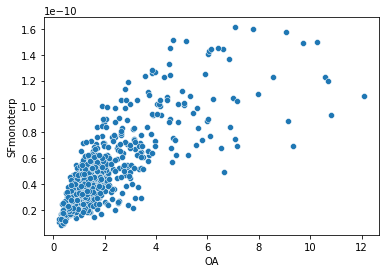

In [108]:
station = 'SMR'
season = dic_season[station]
_df = dic_df[station]['NorESM'].resample('d').mean()

months = seasons2months[season]
_df = _df[_df.index.month.isin(months)]
#_df['SFisoprene'].plot()
sns.scatterplot(y='SFmonoterp', x='OA', data = _df)

<AxesSubplot:xlabel='T_C', ylabel='SFmonoterp'>

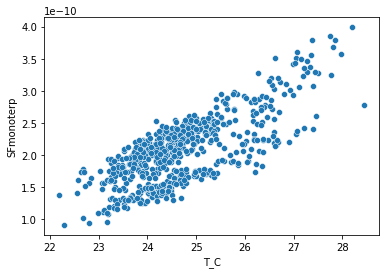

In [109]:
station = 'ATTO'
season = dic_season[station]
_df = dic_df[station]['NorESM'].resample('d').mean()

months = seasons2months[season]
_df = _df[_df.index.month.isin(months)]
#_df['SFisoprene'].plot()
sns.scatterplot(y='SFmonoterp', x='T_C', data = _df)

<AxesSubplot:xlabel='T_C', ylabel='SFisoprene'>

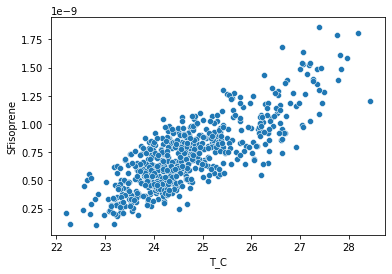

In [110]:
station = 'ATTO'
season = dic_season[station]
_df = dic_df[station]['NorESM'].resample('d').mean()

months = seasons2months[season]
_df = _df[_df.index.month.isin(months)]
#_df['SFisoprene'].plot()
sns.scatterplot(y='SFisoprene', x='T_C', data = _df)

<AxesSubplot:xlabel='time'>

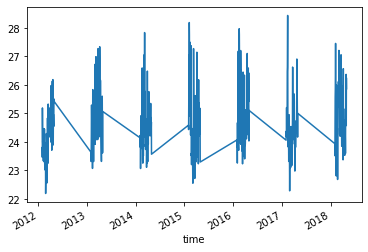

In [111]:
_df['T_C'].plot()


0.2622733961352677


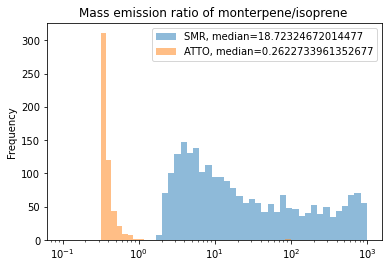

In [112]:
station = 'SMR'
season = dic_season[station]
_df = dic_df[station]['NorESM'].resample('d').mean()

_df['emissions_monoterp2isoprene'] = _df['SFmonoterp']/_df['SFisoprene']
_df = _df[ _df['SFmonoterp']>0]
_df = _df[ _df['SFisoprene']>0]
_df = _df[_df['emissions_monoterp2isoprene'].notna()]

m = _df['emissions_monoterp2isoprene'].median()
label = f'{station}, median={m}'
_df['emissions_monoterp2isoprene'].plot.hist( bins = np.logspace(-1,3), alpha=0.5, label=label)
plt.xscale('log')

station = 'ATTO'
season = dic_season[station]
_df = dic_df[station]['NorESM'].resample('d').mean()

_df['emissions_monoterp2isoprene'] = _df['SFmonoterp']/_df['SFisoprene']
_df = _df[ _df['SFmonoterp']>0]
_df = _df[ _df['SFisoprene']>0]
_df = _df[_df['emissions_monoterp2isoprene'].notna()]
m = _df['emissions_monoterp2isoprene'].median()
print(m)
label = f'{station}, median={m}'
_df['emissions_monoterp2isoprene'].plot.hist( bins = np.logspace(-.5,3), alpha=0.5, label=label)
plt.xscale('log')
plt.title('Mass emission ratio of monterpene/isoprene ')
plt.legend()

In [113]:
isoprene_mass = 68
monoterp_mass = isoprene_mass*2

In [114]:
final_mass = 168

In [115]:
monoterp_yield = 0.15
isoprene_yield = 0.05
monoterp_yield_mass = monoterp_yield*final_mass/monoterp_mass
isoprene_yield_mass = isoprene_yield*final_mass/isoprene_mass
print('monoterp mass yields now:',monoterp_yield_mass)
print('isoprene mass yields now:',isoprene_yield_mass)

monoterp mass yields now: 0.18529411764705883
isoprene mass yields now: 0.12352941176470589


In [116]:
dic_colors = {
    'NorESM' : {'ATTO':'#e41a1c', 'SMR':'#e41a1c'},
    'Observations' : {'ATTO':'k', 'SMR':'k'},
}

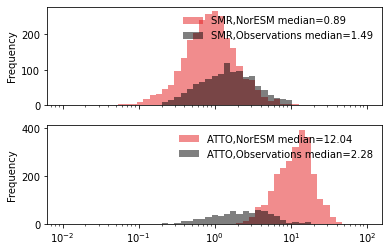

In [117]:
fig, axs = plt.subplots(2,sharex=True)
station = 'SMR'
season = dic_season[station]
ax = axs[0]
for k in dic_df[station].keys():
    _df = dic_df[station][k].resample('d').mean()


    m = _df['OA'].median()
    label = f'{station},{k} median={m:.2f}'
    _df['OA'].plot.hist( bins = np.logspace(-2,2), alpha=0.5, label=label, color = dic_colors[k][station],
                        linewidth=3,
                        ax = ax,
                       histtype='stepfilled', linestyle=':')
    plt.xscale('log')
ax.set_xscale('log')
ax.legend(frameon=False)
ax = axs[1]
station = 'ATTO'
season = dic_season[station]
for k in dic_df[station].keys():
    _df = dic_df[station][k].resample('d').mean()


    m = _df['OA'].median()
    label = f'{station},{k} median={m:.2f}'
    _df['OA'].plot.hist( bins = np.logspace(-2,2), alpha=.5, label=label,color = dic_colors[k][station], linewidth=3,
                        ax = ax,
                        
                       histtype='stepfilled', )
    plt.xscale('log')
ax.set_xscale('log')
ax.legend(frameon=False)

In [118]:
_df = dic_df['ATTO']['NorESM']

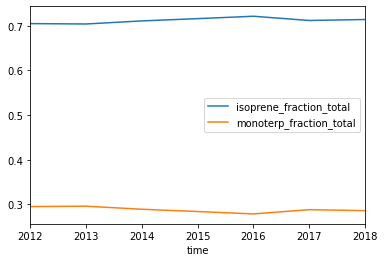

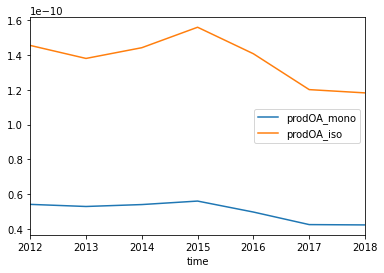

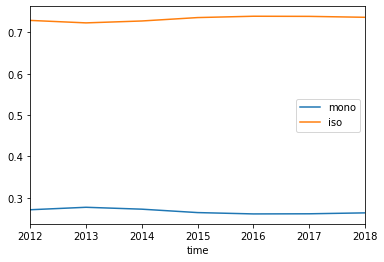

In [119]:
_df = dic_df['ATTO']['NorESM'].resample('d').mean()
_df['prodOA_mono'] = _df['SFmonoterp']*monoterp_yield_mass
_df['prodOA_iso'] = _df['SFisoprene']*isoprene_yield_mass
_df['prodOA_tot'] = _df['prodOA_mono']+_df['prodOA_iso']
_df['monoterp_fraction_total'] =_df['prodOA_mono']/_df['prodOA_tot'] 
_df['isoprene_fraction_total'] =_df['prodOA_iso']/_df['prodOA_tot'] 



_df['isoprene_fraction_total'].resample('Y').mean().plot()
_df['monoterp_fraction_total'].resample('Y').mean().plot()
#_df['scale_OA'].resample('Y').mean().plot()
plt.legend()
plt.show()
_df[['prodOA_mono','prodOA_iso']].resample('Y').mean().plot()


plt.legend()
plt.show()
_df_rs = _df.resample('Y').mean()
(_df_rs['prodOA_mono']/_df_rs['prodOA_tot']).plot(label='mono')
(_df_rs['prodOA_iso']/_df_rs['prodOA_tot']).plot(label='iso')
plt.legend()
plt.show()

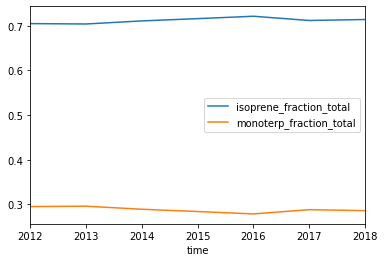

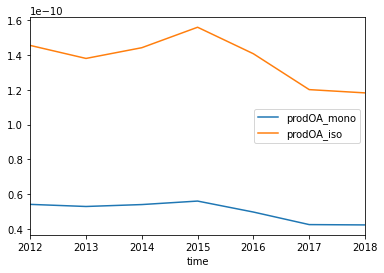

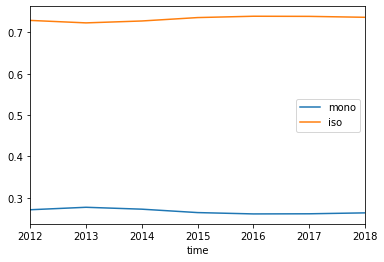

In [120]:
_df = dic_df['ATTO']['NorESM'].resample('d').mean()
_df['prodOA_mono'] = _df['SFmonoterp']*monoterp_yield_mass
_df['prodOA_iso'] = _df['SFisoprene']*isoprene_yield_mass
_df['prodOA_tot'] = _df['prodOA_mono']+_df['prodOA_iso']
_df['monoterp_fraction_total'] =_df['prodOA_mono']/_df['prodOA_tot'] 
_df['isoprene_fraction_total'] =_df['prodOA_iso']/_df['prodOA_tot'] 



_df['isoprene_fraction_total'].resample('Y').mean().plot()
_df['monoterp_fraction_total'].resample('Y').mean().plot()
#_df['scale_OA'].resample('Y').mean().plot()
plt.legend()
plt.show()
_df[['prodOA_mono','prodOA_iso']].resample('Y').mean().plot()


plt.legend()
plt.show()
_df_rs = _df.resample('Y').mean()
(_df_rs['prodOA_mono']/_df_rs['prodOA_tot']).plot(label='mono')
(_df_rs['prodOA_iso']/_df_rs['prodOA_tot']).plot(label='iso')
plt.legend()
plt.show()

In [121]:
_df = dic_df['ATTO']['NorESM'].resample('d').mean()
_df['SFisoprene'].mean()/_df['SFmonoterp'].mean()

4.1066454554475165

In [122]:
_df = dic_df['ATTO']['NorESM'].resample('d').mean()

_df['SFisoprene'].mean()/_df['SFmonoterp'].mean()

4.1066454554475165

In [123]:
_df = dic_df['ATTO']['NorESM'].resample('d').mean()

_df['SFmonoterp'].mean()

2.711548098970101e-10

In [124]:
_df = dic_df['ATTO']['NorESM'].resample('d').mean()

_df['SFmonoterp'].mean()

2.711548098970101e-10

In [125]:
_df = dic_df['ATTO']['NorESM'].resample('d').mean()

_df['SFisoprene'].mean()

1.1135366677862917e-09

In [126]:
_df = dic_df['ATTO']['NorESM'].resample('d').mean()

_df['SFisoprene'].mean()

1.1135366677862917e-09

In [127]:
monoterp_yield_mass

0.18529411764705883

In [128]:
def merge_two_sources(df1,df2,name1,name2, v1,v2):
    _df1 = df1[v1].rename(name1)
    _df2 = df2[v2].rename(name2)
    return pd.concat([_df1,_df2], axis=1)
    
    

ATTO
SMR


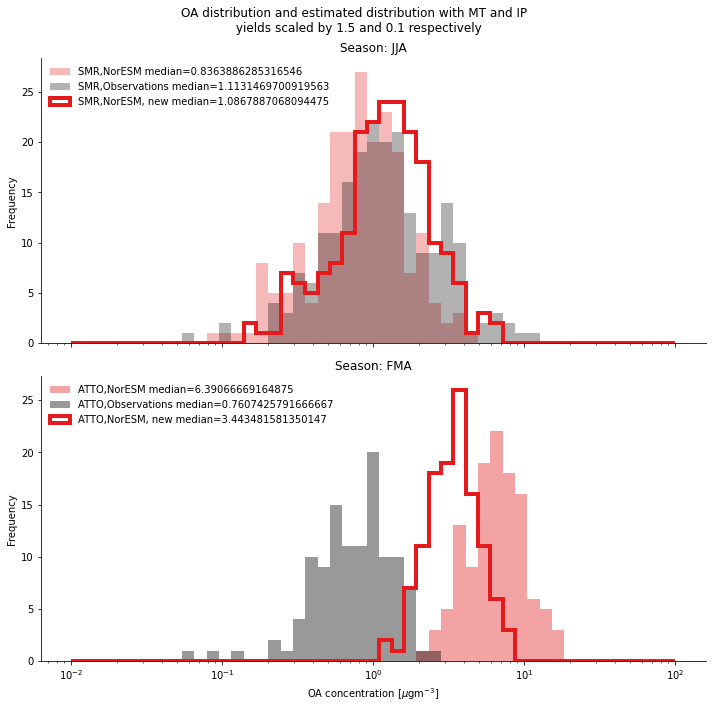

In [129]:
s_mono = 1.5
s_isop = .1
for station in dic_df.keys():
    print(station)
    _df = dic_df[station]['NorESM'].resample('d').mean()
    _df['prodOA_mono'] = _df['SFmonoterp']*monoterp_yield_mass
    _df['prodOA_iso'] = _df['SFisoprene']*isoprene_yield_mass

    _df['monoterp_fraction_total'] =_df['prodOA_mono']/(_df['prodOA_mono']+ _df['prodOA_iso'])
    _df['isoprene_fraction_total'] =_df['prodOA_iso']/(_df['prodOA_mono']+ _df['prodOA_iso'])    
    _df['scale_OA'] =_df['monoterp_fraction_total']*s_mono + _df['isoprene_fraction_total']*s_isop
    _df['OA_new'] = _df['OA']*(_df['monoterp_fraction_total']*s_mono + _df['isoprene_fraction_total']*s_isop)
    dic_df[station]['NorESM'] = _df
    
    

    
    
fig, axs = plt.subplots(2, sharex=True, figsize=(10,10,))
ax = axs[0]
station = 'SMR'
season = dic_season[station]
#for k in dic_df[station].keys():
_df= merge_two_sources(dic_df[station]['Observations'],dic_df[station]['NorESM'], 'Observations','NorESM','OA', 'OA')
_df = _df[_df.index.month.isin(months)]
_df = _df.dropna()

for k in dic_df[station].keys():
    m = _df[k].median()
    label = f'{station},{k} median={m}'
    _df[k].plot.hist( bins = np.logspace(-2,2), alpha=0.3, label=label, color = dic_colors[k][station],
                        linewidth=3,
                     ax = ax,
                       histtype='stepfilled', linestyle=':')

k= 'NorESM'
#_df= merge_two_sources(dic_df[station]['Observations'],dic_df[station]['NorESM'], 'Observations','NorESM','OA', 'OA_new')
_df= merge_two_sources(dic_df[station]['Observations'],dic_df[station]['NorESM'], 'Observations','NorESM','OA', 'OA_new')
_df = _df[_df.index.month.isin(months)]
m = _df[k].median()
_df = _df.dropna()

label = f'{station},{k}, new median={m}'
_df[k].plot.hist( bins = np.logspace(-2,2), alpha=1, label=label, color =  dic_colors[k][station],
                        linewidth=4,
                     ax = ax,
                 
                       histtype='step', )
ax.set_xscale('log')
ax.set_title(f'Season: {season}')

ax.legend(frameon=False, loc=2)    

ax = axs[1]

station = 'ATTO'
season = dic_season[station]
months = seasons2months[season]
_df= merge_two_sources(dic_df[station]['Observations'],dic_df[station]['NorESM'], 'Observations','NorESM','OA', 'OA')
_df = _df[_df.index.month.isin(months)]
_df = _df.dropna()

for k in dic_df[station].keys():
    m = _df[k].median()
    label = f'{station},{k} median={m}'
    _df[k].plot.hist( bins = np.logspace(-2,2), alpha=.4, label=label, color = dic_colors[k][station],
                        linewidth=3,
                     ax = ax,
                     
                       histtype='stepfilled', linestyle='--')

k= 'NorESM'
_df= merge_two_sources(dic_df[station]['Observations'],dic_df[station]['NorESM'], 'Observations','NorESM','OA', 'OA_new')
_df = _df[_df.index.month.isin(months)]
_df = _df.dropna()
m = _df[k].median()
label = f'{station},{k}, new median={m}'
_df[k].plot.hist( bins = np.logspace(-2,2), alpha=1, label=label, color = dic_colors[k][station],
                        linewidth=4,
                     ax = ax,
                 
                       histtype='step', )

ax.set_xscale('log')
ax.legend(frameon=False, loc=2)    
ax.set_title(f'Season: {season}')
plt.suptitle(f'OA distribution and estimated distribution with MT and IP \n yields scaled by {s_mono} and {s_isop} respectively')
sns.despine(fig)
ax.set_xlabel('OA concentration [$\mu$gm$^{-3}$]')
fn = f'Plots/noresm_yield_adjust_ym{s_mono}_yiso{s_isop}.pdf'
fig.tight_layout()
fig.savefig(fn)

ATTO
SMR


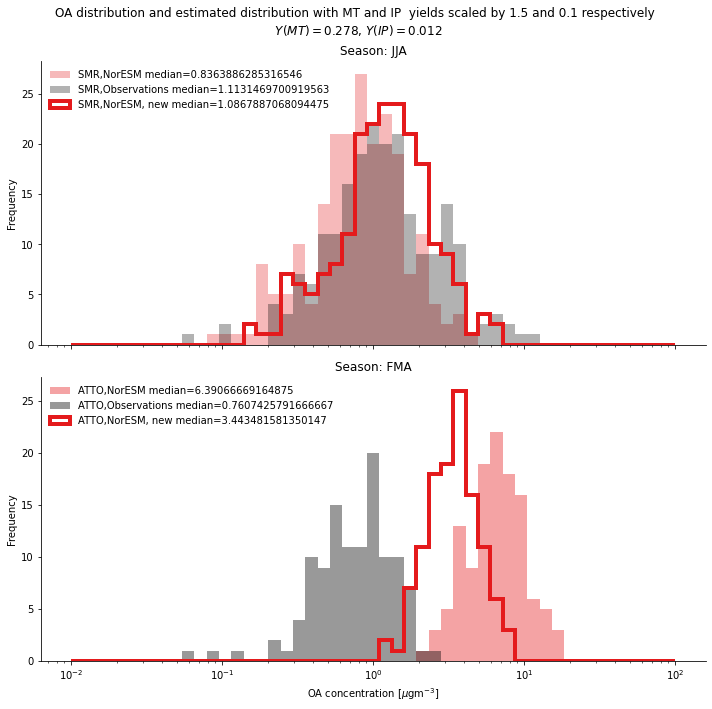

In [130]:
s_mono = 1.5
s_isop = 0.1
for station in dic_df.keys():
    print(station)
    _df = dic_df[station]['NorESM'].resample('d').mean()
    _df['prodOA_mono'] = _df['SFmonoterp']*monoterp_yield_mass
    _df['prodOA_iso'] = _df['SFisoprene']*isoprene_yield_mass

    _df['monoterp_fraction_total'] =_df['prodOA_mono']/(_df['prodOA_mono']+ _df['prodOA_iso'])
    _df['isoprene_fraction_total'] =_df['prodOA_iso']/(_df['prodOA_mono']+ _df['prodOA_iso'])    
    _df['scale_OA'] =_df['monoterp_fraction_total']*s_mono + _df['isoprene_fraction_total']*s_isop
    _df['OA_new'] = _df['OA']*(_df['monoterp_fraction_total']*s_mono + _df['isoprene_fraction_total']*s_isop)
    dic_df[station]['NorESM'] = _df
    
    

    
    
fig, axs = plt.subplots(2, sharex=True, figsize=(10,10,))
ax = axs[0]
station = 'SMR'
season = dic_season[station]
#for k in dic_df[station].keys():
_df= merge_two_sources(dic_df[station]['Observations'],dic_df[station]['NorESM'], 'Observations','NorESM','OA', 'OA')
_df = _df[_df.index.month.isin(months)]
_df = _df.dropna()

for k in dic_df[station].keys():
    m = _df[k].median()
    label = f'{station},{k} median={m}'
    _df[k].plot.hist( bins = np.logspace(-2,2), alpha=0.3, label=label, color = dic_colors[k][station],
                        linewidth=3,
                     ax = ax,
                       histtype='stepfilled', linestyle=':')

k= 'NorESM'
#_df= merge_two_sources(dic_df[station]['Observations'],dic_df[station]['NorESM'], 'Observations','NorESM','OA', 'OA_new')
_df= merge_two_sources(dic_df[station]['Observations'],dic_df[station]['NorESM'], 'Observations','NorESM','OA', 'OA_new')
_df = _df[_df.index.month.isin(months)]
m = _df[k].median()
_df = _df.dropna()

label = f'{station},{k}, new median={m}'
_df[k].plot.hist( bins = np.logspace(-2,2), alpha=1, label=label, color =  dic_colors[k][station],
                        linewidth=4,
                     ax = ax,
                 
                       histtype='step', )
ax.set_xscale('log')
ax.set_title(f'Season: {season}')

ax.legend(frameon=False, loc=2)    

ax = axs[1]

station = 'ATTO'
season = dic_season[station]
months = seasons2months[season]
_df= merge_two_sources(dic_df[station]['Observations'],dic_df[station]['NorESM'], 'Observations','NorESM','OA', 'OA')
_df = _df[_df.index.month.isin(months)]
_df = _df.dropna()

for k in dic_df[station].keys():
    m = _df[k].median()
    label = f'{station},{k} median={m}'
    _df[k].plot.hist( bins = np.logspace(-2,2), alpha=.4, label=label, color = dic_colors[k][station],
                        linewidth=3,
                     ax = ax,
                     
                       histtype='stepfilled', linestyle='--')

k= 'NorESM'
_df= merge_two_sources(dic_df[station]['Observations'],dic_df[station]['NorESM'], 'Observations','NorESM','OA', 'OA_new')
_df = _df[_df.index.month.isin(months)]
_df = _df.dropna()
m = _df[k].median()
label = f'{station},{k}, new median={m}'
_df[k].plot.hist( bins = np.logspace(-2,2), alpha=1, label=label, color = dic_colors[k][station],
                        linewidth=4,
                     ax = ax,
                 
                       histtype='step', )

ax.set_xscale('log')
ax.legend(frameon=False, loc=2)    
ax.set_title(f'Season: {season}')
yields_string =  f'$Y(MT)={(monoterp_yield_mass*s_mono):.3f}$, $Y(IP)={(isoprene_yield_mass*s_isop):.3f}$'
plt.suptitle(f'OA distribution and estimated distribution with MT and IP  yields scaled by {s_mono} and {s_isop} respectively \n {yields_string}')
sns.despine(fig)
ax.set_xlabel('OA concentration [$\mu$gm$^{-3}$]')
fn = f'Plots/noresm_yield_adjust_ym{s_mono}_yiso{s_isop}.pdf'
fig.tight_layout()
fig.savefig(fn)

ATTO
SMR


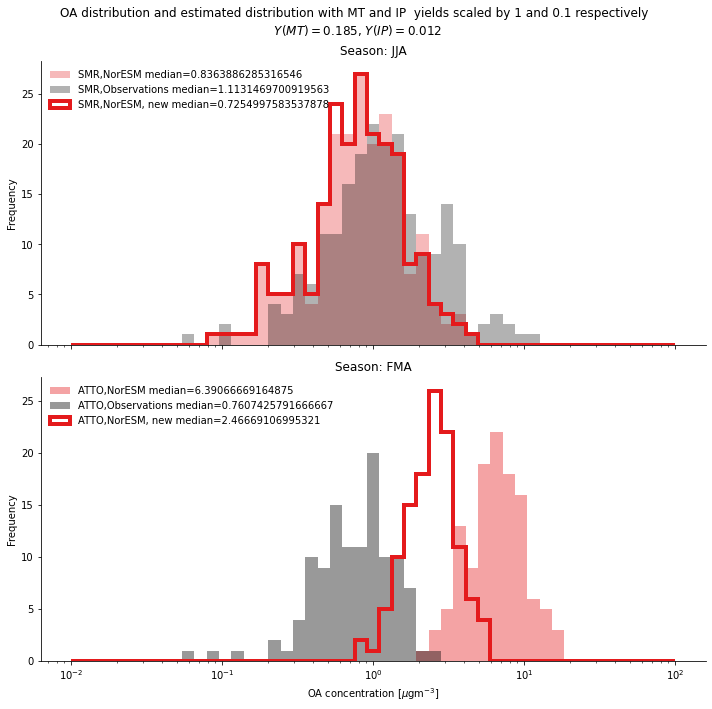

In [131]:
s_mono = 1
s_isop = 0.1
for station in dic_df.keys():
    print(station)
    _df = dic_df[station]['NorESM'].resample('d').mean()
    _df['prodOA_mono'] = _df['SFmonoterp']*monoterp_yield_mass
    _df['prodOA_iso'] = _df['SFisoprene']*isoprene_yield_mass

    _df['monoterp_fraction_total'] =_df['prodOA_mono']/(_df['prodOA_mono']+ _df['prodOA_iso'])
    _df['isoprene_fraction_total'] =_df['prodOA_iso']/(_df['prodOA_mono']+ _df['prodOA_iso'])    
    _df['scale_OA'] =_df['monoterp_fraction_total']*s_mono + _df['isoprene_fraction_total']*s_isop
    _df['OA_new'] = _df['OA']*(_df['monoterp_fraction_total']*s_mono + _df['isoprene_fraction_total']*s_isop)
    dic_df[station]['NorESM'] = _df
    
    

    
    
fig, axs = plt.subplots(2, sharex=True, figsize=(10,10,))
ax = axs[0]
station = 'SMR'
season = dic_season[station]
#for k in dic_df[station].keys():
_df= merge_two_sources(dic_df[station]['Observations'],dic_df[station]['NorESM'], 'Observations','NorESM','OA', 'OA')
_df = _df[_df.index.month.isin(months)]
_df = _df.dropna()

for k in dic_df[station].keys():
    m = _df[k].median()
    label = f'{station},{k} median={m}'
    _df[k].plot.hist( bins = np.logspace(-2,2), alpha=0.3, label=label, color = dic_colors[k][station],
                        linewidth=3,
                     ax = ax,
                       histtype='stepfilled', linestyle=':')

k= 'NorESM'
#_df= merge_two_sources(dic_df[station]['Observations'],dic_df[station]['NorESM'], 'Observations','NorESM','OA', 'OA_new')
_df= merge_two_sources(dic_df[station]['Observations'],dic_df[station]['NorESM'], 'Observations','NorESM','OA', 'OA_new')
_df = _df[_df.index.month.isin(months)]
m = _df[k].median()
_df = _df.dropna()

label = f'{station},{k}, new median={m}'
_df[k].plot.hist( bins = np.logspace(-2,2), alpha=1, label=label, color =  dic_colors[k][station],
                        linewidth=4,
                     ax = ax,
                 
                       histtype='step', )
ax.set_xscale('log')
ax.set_title(f'Season: {season}')

ax.legend(frameon=False, loc=2)    

ax = axs[1]

station = 'ATTO'
season = dic_season[station]
months = seasons2months[season]
_df= merge_two_sources(dic_df[station]['Observations'],dic_df[station]['NorESM'], 'Observations','NorESM','OA', 'OA')
_df = _df[_df.index.month.isin(months)]
_df = _df.dropna()

for k in dic_df[station].keys():
    m = _df[k].median()
    label = f'{station},{k} median={m}'
    _df[k].plot.hist( bins = np.logspace(-2,2), alpha=.4, label=label, color = dic_colors[k][station],
                        linewidth=3,
                     ax = ax,
                     
                       histtype='stepfilled', linestyle='--')

k= 'NorESM'
_df= merge_two_sources(dic_df[station]['Observations'],dic_df[station]['NorESM'], 'Observations','NorESM','OA', 'OA_new')
_df = _df[_df.index.month.isin(months)]
_df = _df.dropna()
m = _df[k].median()
label = f'{station},{k}, new median={m}'
_df[k].plot.hist( bins = np.logspace(-2,2), alpha=1, label=label, color = dic_colors[k][station],
                        linewidth=4,
                     ax = ax,
                 
                       histtype='step', )

ax.set_xscale('log')
ax.legend(frameon=False, loc=2)    
ax.set_title(f'Season: {season}')
yields_string =  f'$Y(MT)={(monoterp_yield_mass*s_mono):.3f}$, $Y(IP)={(isoprene_yield_mass*s_isop):.3f}$'
plt.suptitle(f'OA distribution and estimated distribution with MT and IP  yields scaled by {s_mono} and {s_isop} respectively \n {yields_string}')
sns.despine(fig)
ax.set_xlabel('OA concentration [$\mu$gm$^{-3}$]')
fn = f'Plots/noresm_yield_adjust_ym{s_mono}_yiso{s_isop}.pdf'
fig.tight_layout()
fig.savefig(fn)

ATTO
SMR


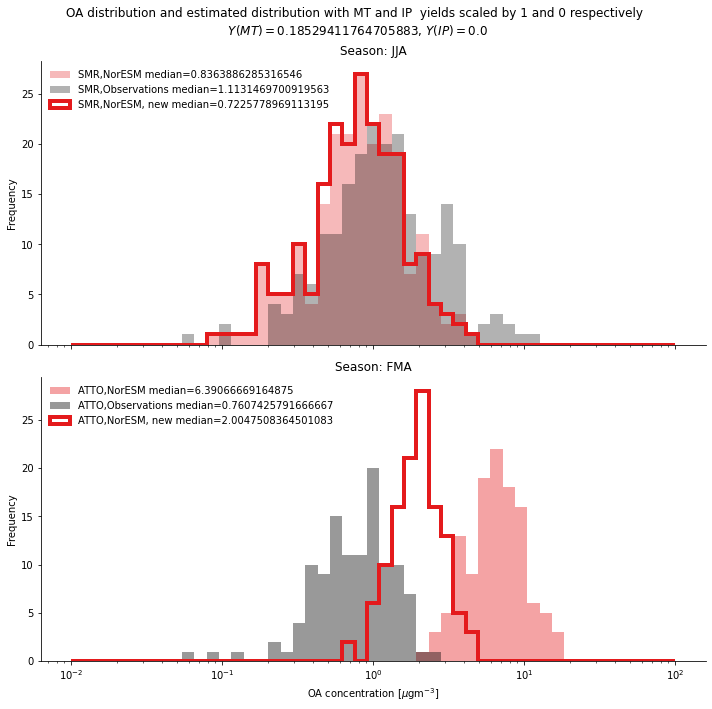

In [132]:
s_mono = 1
s_isop = 0
for station in dic_df.keys():
    print(station)
    _df = dic_df[station]['NorESM'].resample('d').mean()
    _df['prodOA_mono'] = _df['SFmonoterp']*monoterp_yield_mass
    _df['prodOA_iso'] = _df['SFisoprene']*isoprene_yield_mass

    _df['monoterp_fraction_total'] =_df['prodOA_mono']/(_df['prodOA_mono']+ _df['prodOA_iso'])
    _df['isoprene_fraction_total'] =_df['prodOA_iso']/(_df['prodOA_mono']+ _df['prodOA_iso'])    
    _df['scale_OA'] =_df['monoterp_fraction_total']*s_mono + _df['isoprene_fraction_total']*s_isop
    _df['OA_new'] = _df['OA']*(_df['monoterp_fraction_total']*s_mono + _df['isoprene_fraction_total']*s_isop)
    dic_df[station]['NorESM'] = _df
    
    

    
    
fig, axs = plt.subplots(2, sharex=True, figsize=(10,10,))
ax = axs[0]
station = 'SMR'
season = dic_season[station]
#for k in dic_df[station].keys():
_df= merge_two_sources(dic_df[station]['Observations'],dic_df[station]['NorESM'], 'Observations','NorESM','OA', 'OA')
_df = _df[_df.index.month.isin(months)]
_df = _df.dropna()

for k in dic_df[station].keys():
    m = _df[k].median()
    label = f'{station},{k} median={m}'
    _df[k].plot.hist( bins = np.logspace(-2,2), alpha=0.3, label=label, color = dic_colors[k][station],
                        linewidth=3,
                     ax = ax,
                       histtype='stepfilled', linestyle=':')

k= 'NorESM'
#_df= merge_two_sources(dic_df[station]['Observations'],dic_df[station]['NorESM'], 'Observations','NorESM','OA', 'OA_new')
_df= merge_two_sources(dic_df[station]['Observations'],dic_df[station]['NorESM'], 'Observations','NorESM','OA', 'OA_new')
_df = _df[_df.index.month.isin(months)]
m = _df[k].median()
_df = _df.dropna()

label = f'{station},{k}, new median={m}'
_df[k].plot.hist( bins = np.logspace(-2,2), alpha=1, label=label, color =  dic_colors[k][station],
                        linewidth=4,
                     ax = ax,
                 
                       histtype='step', )
ax.set_xscale('log')
ax.set_title(f'Season: {season}')

ax.legend(frameon=False, loc=2)    

ax = axs[1]

station = 'ATTO'
season = dic_season[station]
months = seasons2months[season]
_df= merge_two_sources(dic_df[station]['Observations'],dic_df[station]['NorESM'], 'Observations','NorESM','OA', 'OA')
_df = _df[_df.index.month.isin(months)]
_df = _df.dropna()

for k in dic_df[station].keys():
    m = _df[k].median()
    label = f'{station},{k} median={m}'
    _df[k].plot.hist( bins = np.logspace(-2,2), alpha=.4, label=label, color = dic_colors[k][station],
                        linewidth=3,
                     ax = ax,
                     
                       histtype='stepfilled', linestyle='--')

k= 'NorESM'
_df= merge_two_sources(dic_df[station]['Observations'],dic_df[station]['NorESM'], 'Observations','NorESM','OA', 'OA_new')
_df = _df[_df.index.month.isin(months)]
_df = _df.dropna()
m = _df[k].median()
label = f'{station},{k}, new median={m}'
_df[k].plot.hist( bins = np.logspace(-2,2), alpha=1, label=label, color = dic_colors[k][station],
                        linewidth=4,
                     ax = ax,
                 
                       histtype='step', )

ax.set_xscale('log')
ax.legend(frameon=False, loc=2)    
ax.set_title(f'Season: {season}')
yields_string =  f'$Y(MT)={monoterp_yield_mass*s_mono}$, $Y(IP)={isoprene_yield_mass*s_isop}$'
plt.suptitle(f'OA distribution and estimated distribution with MT and IP  yields scaled by {s_mono} and {s_isop} respectively \n {yields_string}')
sns.despine(fig)
ax.set_xlabel('OA concentration [$\mu$gm$^{-3}$]')
fn = f'Plots/noresm_yield_adjust_ym{s_mono}_yiso{s_isop}.pdf'
fig.tight_layout()
fig.savefig(fn)

ATTO
SMR


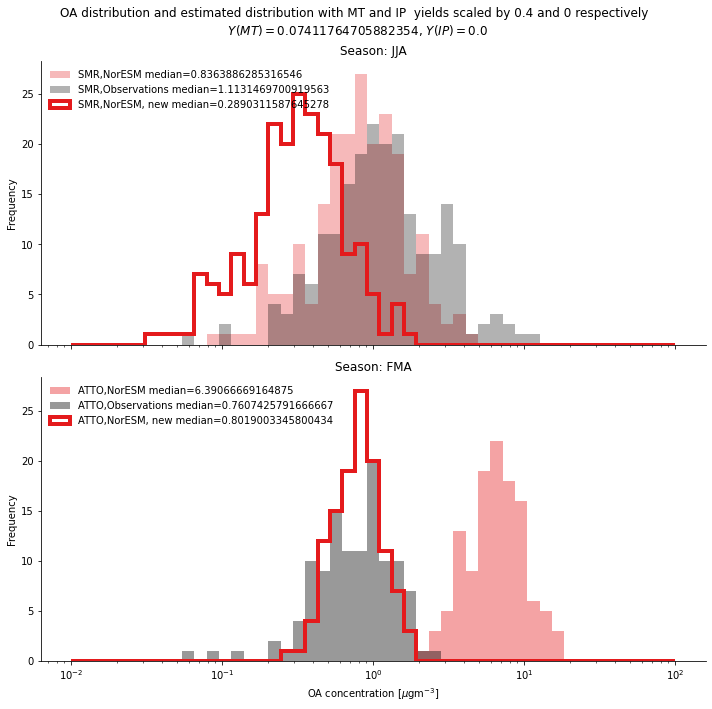

In [134]:
s_mono = .4
s_isop = 0
for station in dic_df.keys():
    print(station)
    _df = dic_df[station]['NorESM'].resample('d').mean()
    _df['prodOA_mono'] = _df['SFmonoterp']*monoterp_yield_mass
    _df['prodOA_iso'] = _df['SFisoprene']*isoprene_yield_mass

    _df['monoterp_fraction_total'] =_df['prodOA_mono']/(_df['prodOA_mono']+ _df['prodOA_iso'])
    _df['isoprene_fraction_total'] =_df['prodOA_iso']/(_df['prodOA_mono']+ _df['prodOA_iso'])    
    _df['scale_OA'] =_df['monoterp_fraction_total']*s_mono + _df['isoprene_fraction_total']*s_isop
    _df['OA_new'] = _df['OA']*(_df['monoterp_fraction_total']*s_mono + _df['isoprene_fraction_total']*s_isop)
    dic_df[station]['NorESM'] = _df
    
    

    
    
fig, axs = plt.subplots(2, sharex=True, figsize=(10,10,))
ax = axs[0]
station = 'SMR'
season = dic_season[station]
#for k in dic_df[station].keys():
_df= merge_two_sources(dic_df[station]['Observations'],dic_df[station]['NorESM'], 'Observations','NorESM','OA', 'OA')
_df = _df[_df.index.month.isin(months)]
_df = _df.dropna()

for k in dic_df[station].keys():
    m = _df[k].median()
    label = f'{station},{k} median={m}'
    _df[k].plot.hist( bins = np.logspace(-2,2), alpha=0.3, label=label, color = dic_colors[k][station],
                        linewidth=3,
                     ax = ax,
                       histtype='stepfilled', linestyle=':')

k= 'NorESM'
#_df= merge_two_sources(dic_df[station]['Observations'],dic_df[station]['NorESM'], 'Observations','NorESM','OA', 'OA_new')
_df= merge_two_sources(dic_df[station]['Observations'],dic_df[station]['NorESM'], 'Observations','NorESM','OA', 'OA_new')
_df = _df[_df.index.month.isin(months)]
m = _df[k].median()
_df = _df.dropna()

label = f'{station},{k}, new median={m}'
_df[k].plot.hist( bins = np.logspace(-2,2), alpha=1, label=label, color =  dic_colors[k][station],
                        linewidth=4,
                     ax = ax,
                 
                       histtype='step', )
ax.set_xscale('log')
ax.set_title(f'Season: {season}')

ax.legend(frameon=False, loc=2)    

ax = axs[1]

station = 'ATTO'
season = dic_season[station]
months = seasons2months[season]
_df= merge_two_sources(dic_df[station]['Observations'],dic_df[station]['NorESM'], 'Observations','NorESM','OA', 'OA')
_df = _df[_df.index.month.isin(months)]
_df = _df.dropna()

for k in dic_df[station].keys():
    m = _df[k].median()
    label = f'{station},{k} median={m}'
    _df[k].plot.hist( bins = np.logspace(-2,2), alpha=.4, label=label, color = dic_colors[k][station],
                        linewidth=3,
                     ax = ax,
                     
                       histtype='stepfilled', linestyle='--')

k= 'NorESM'
_df= merge_two_sources(dic_df[station]['Observations'],dic_df[station]['NorESM'], 'Observations','NorESM','OA', 'OA_new')
_df = _df[_df.index.month.isin(months)]
_df = _df.dropna()
m = _df[k].median()
label = f'{station},{k}, new median={m}'
_df[k].plot.hist( bins = np.logspace(-2,2), alpha=1, label=label, color = dic_colors[k][station],
                        linewidth=4,
                     ax = ax,
                 
                       histtype='step', )

ax.set_xscale('log')
ax.legend(frameon=False, loc=2)    
ax.set_title(f'Season: {season}')
yields_string =  f'$Y(MT)={monoterp_yield_mass*s_mono}$, $Y(IP)={isoprene_yield_mass*s_isop}$'
plt.suptitle(f'OA distribution and estimated distribution with MT and IP  yields scaled by {s_mono} and {s_isop} respectively \n {yields_string}')
sns.despine(fig)
ax.set_xlabel('OA concentration [$\mu$gm$^{-3}$]')
fn = f'Plots/noresm_yield_adjust_ym{s_mono}_yiso{s_isop}.pdf'
fig.tight_layout()
fig.savefig(fn)